# Assignment 1

## Question 1

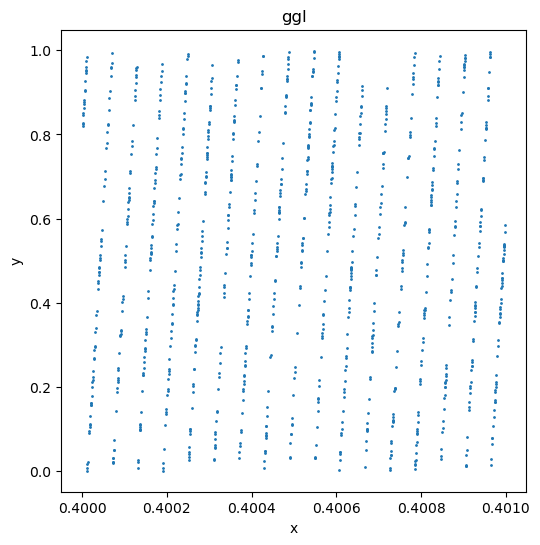

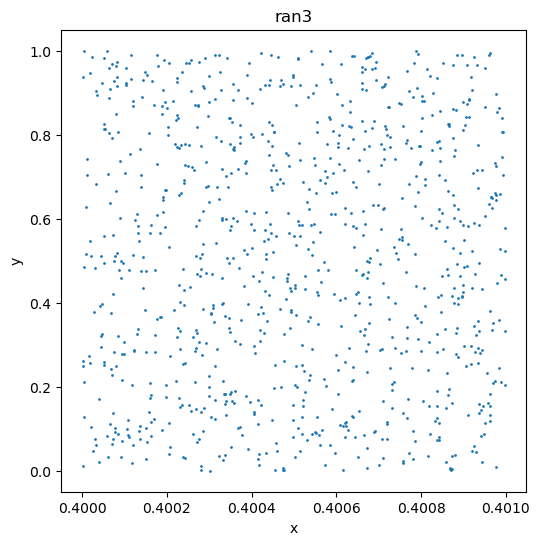

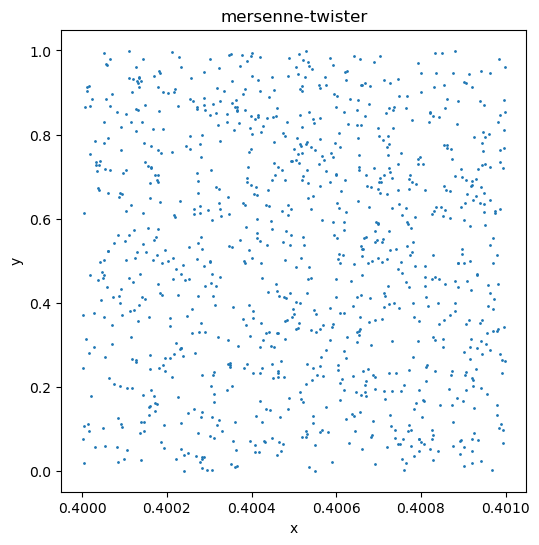

In [2]:
import random
import matplotlib.pyplot as plt

seed = 401

def ggl(seed, size):
    random_numbers = []
    x = seed
    for _ in range(size):
        x = (16807 * x + 0) % (2**31 - 1)  # ggl equation
        random_numbers.append(x / (2**31 - 1))  # normalize to [0,1]
    return random_numbers

def ran3(seed, size):
    # initialize with 55 random numbers using ggl
    buffer_size = 55
    buffer = ggl(seed, buffer_size)
    
    random_numbers = []
    for i in range(size):
        index_55 = i % buffer_size  # circular buffer
        index_24 = (i + 31) % buffer_size  # offset for i-24
        
        new_value = (buffer[index_55] - buffer[index_24]) % (2**32)
        
        buffer[index_55] = new_value
        random_numbers.append(new_value / (2**32))  # normalize

    return random_numbers

def mersenne_twister(seed, size):
    random.seed(seed)
    return [random.random() for _ in range(size)]

def generate_pairs(rng, size):
    numbers = rng(size * 2)  # need twice as many numbers for (x, y) pairs
    return [(numbers[i], numbers[i+1]) for i in range(0, len(numbers), 2)]

size = 1000000
x_interval = [0.4, 0.401]  #small interval for x

ggl_pairs = generate_pairs(lambda size: ggl(seed, size), size)
ran3_pairs = generate_pairs(lambda size: ran3(seed, size), size)
mt_pairs = generate_pairs(lambda size: mersenne_twister(seed, size), size)

def filter_points(pairs, x_interval):
    return [(x, y) for x, y in pairs if x_interval[0] <= x <= x_interval[1]]

ggl_filtered = filter_points(ggl_pairs, x_interval)
ran3_filtered = filter_points(ran3_pairs, x_interval)
mt_filtered = filter_points(mt_pairs, x_interval)

def plot_points(points, title):
    plt.figure(figsize=(6, 6))
    x_vals, y_vals = zip(*points)
    plt.scatter(x_vals, y_vals, s=1)
    plt.title(title)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()

plot_points(ggl_filtered, "ggl")
plot_points(ran3_filtered, "ran3")
plot_points(mt_filtered, "mersenne-twister")

### Findings

The first figure (GGL), shows a linear pattern of points aligned along a parallel lines, seemingly going from bottom-left to top-right. The second figure (ran3) exhibits no clear pattern, with points scattered randomly across the plot. The third figure (Mersenne Twister) also shows a random distribution of points, with no discernible pattern.

The linear patterns observed in the GGL plot, with dots aligned in parallel lines, are a result of the inherent limitations of this type of RNG. While LCGs like GGL are simple and fast, they come with known issues due to their relatively short period. They are susceptible to correlations which manifests as visible regularity, leading to the observed parallel lines. This behavior reflects the deterministic nature and correlation problems common in LCG-based random number generators.

The ran3 and Mersenne Twister plots, on the other hand, show no such patterns. The ran3 plot appears to be uniformly distributed, while the Mersenne Twister plot shows a similar random distribution, but with a different set of points. This is expected, as both ran3 and Mersenne Twister are more sophisticated RNGs with longer periods and better statistical properties compared to LCGs like GGL.

## Question 2

### a)

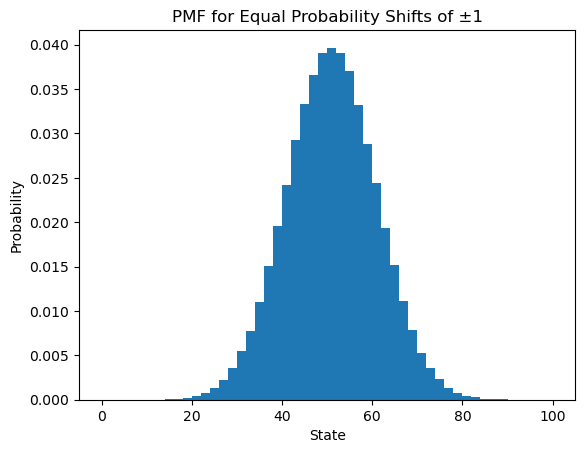

In [10]:
import numpy as np

# parameters
n_agents = 500000
initial_state = 50
n_interactions = 100

# simulation of the interactions
states = np.full(n_agents, initial_state)

# apply 100 random changes (+1 or -1)
for _ in range(n_interactions):
    states += np.random.choice([-1, 1], size=n_agents)

# plot PMF
plt.hist(states, bins=50, density=True)
plt.title('PMF for Equal Probability Shifts of ±1')
plt.xlabel('State')
plt.ylabel('Probability')
plt.show()

### PMF and PDF

The observed PMF is a binomial distribution, which approaches a normal distribution as the number of interactions increases.

### b)

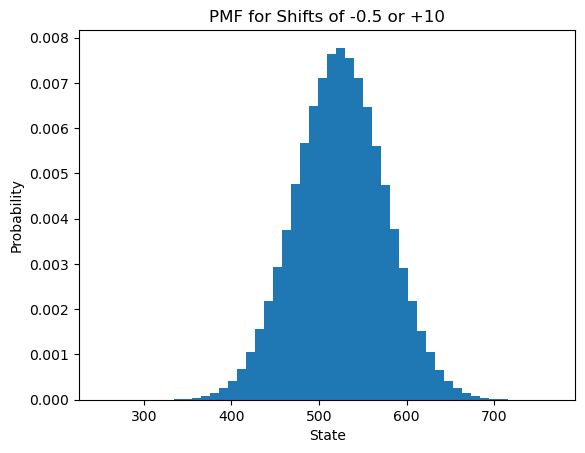

In [24]:
# initialize the states array as float
states = np.full(n_agents, initial_state, dtype=float)

# Simulation of interactions with shifts -0.5 or +10
for _ in range(n_interactions):
    states += np.random.choice([-0.5, 10], size=n_agents)

# Plot PMF
plt.hist(states, bins=50, density=True)
plt.title('PMF for Shifts of -0.5 or +10')
plt.xlabel('State')
plt.ylabel('Probability')
plt.show()

### PMF and PDF

The observed PMF is a binomial distribution, which approaches a normal distribution as the number of interactions increases.

### c)

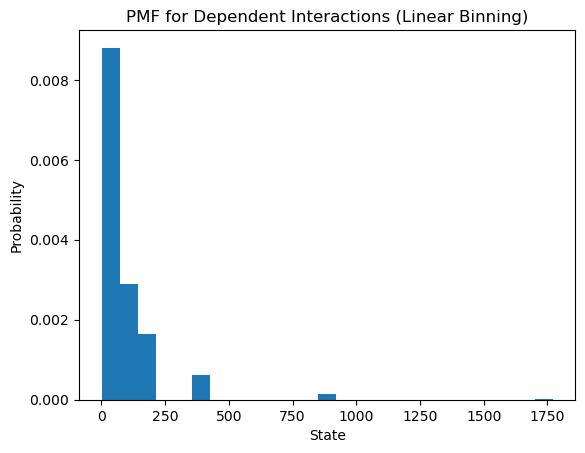

In [26]:
# params
n_agents = 500000
initial_state = 50
n_interactions = 10
c = 0.7

# init states
states = np.full(n_agents, initial_state, dtype=np.float64)

# sim of interactions
for _ in range(n_interactions):
    shifts = np.random.choice([c, 1/c], size=n_agents)
    states *= shifts  # Multiplying state by c or 1/c

# Plot PMF with linear binning
plt.hist(states, bins=25, density=True)
plt.title('PMF for Dependent Interactions (Linear Binning)')
plt.xlabel('State')
plt.ylabel('Probability')
plt.show()

Simply looking at the above figure, it is difficult to say what the distribution is for certain, however a justified guess might be that it approaches a log-normal distribution.

Next we will plot the PMF with logarithmic binning to see if it confirms this hypothesis.
 
First we only scale the x-axis logarithmically.

If the distribution is log-normal, the PMF will appear as a binomial (approaching normal) distribution when plotted with logarithmic binning.

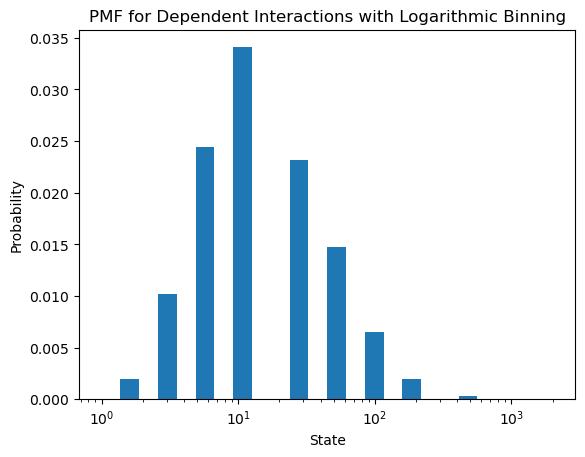

In [27]:
bins = np.logspace(np.log10(1), np.log10(2000), 25)

# Logarithmic binning and density=True for PMF
plt.hist(states, bins=bins, density=True)

plt.xscale('log')
plt.yscale('linear')

# plt.xscale('linear')
# plt.yscale('log')

# Display the plot
plt.title('PMF for Dependent Interactions with Logarithmic Binning')
plt.xlabel('State')
plt.ylabel('Probability')
plt.show()

Indeed, the PMF with logarithmic binning shows a binomial distribution, which approaches a normal distribution as the number of interactions increases. This suggests that the distribution of states is log-normal, as expected.

We furthermore plot the PDF while only scaling the y-axis logarithmically. This hsould make the log-normal distribution more visible.

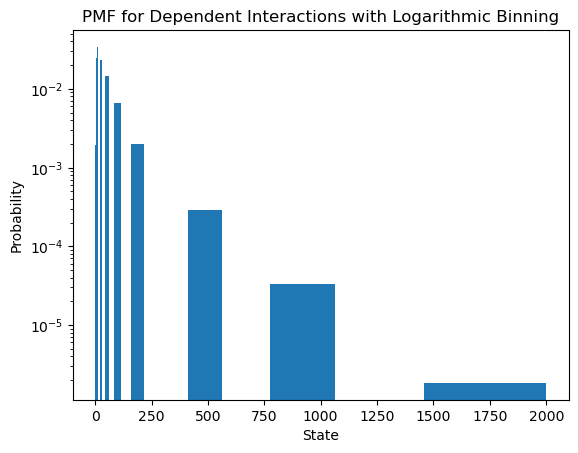

In [28]:
bins = np.logspace(np.log10(1), np.log10(2000), 25)

# Logarithmic binning and density=True for PMF
plt.hist(states, bins=bins, density=True)

plt.xscale('linear')
plt.yscale('log')

plt.title('PMF for Dependent Interactions with Logarithmic Binning')
plt.xlabel('State')
plt.ylabel('Probability')
plt.show()

Furthermore, the stochastic process in question is multiplicative noise.